# Fase 7 EDR

Los datos **no son una tabla agregada**. Si ves el archivo *summary* de test y train, es parte de las variables, y un csv. Ese csv contiene lo que parece ser una serie temporal con datos sobre el el estado del aterrizaje en cada instante de tiempo.

## EL PLAN
Necesitamos analizar las series temporales para sacar información sobre ellas, y agregarlas a los datos del excel para poder llevar a cabo una **regressión**.

#### Wind y turbulence
>https://www.gymlibrary.ml/environments/box2d/lunar_lander/#arguments

Son argumentos del AI gym que han enmascarado
Lo que haremos es primero entender cómo podemos analizar cada uno de los `experiments` y sacar atributos sobre ellos. Con eso, haremos <u>dos KNN inputer</u> para ambos wind y turbulence

## Origen de los datos (QUITAR AL ENTREGAR NO SEAMOS GILIPOLLAS)BOLUDOS
Donde se han simulado los datos:
>https://github.com/huggingface/deep-rl-class/tree/main/unit1/

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from f7utils import *
from typing import List, TypeVar, NewType, Tuple

# Creaate the np array type without the nptyping library
NDArray = NewType("NDArray", np.ndarray)

Estructura de la carpeta:

In [19]:
!tree . -L 2

.
├── data
│   ├── datos.zip
│   ├── experiments_summary_test.xlsx
│   ├── experiments_summary_train.xlsx
│   ├── metadata.txt
│   ├── test
│   └── train
├── fase7.ipynb
├── LICENSE
├── README.md
└── test.py

3 directories, 8 files


## EDA

#### 
Exploraremos primero uno de los CSV

In [85]:
exp1 = pd.read_csv('data/train/experiment_4.csv')
exp1.tail()

,x_pos,y_pos,x_vel,y_vel,angle,ang_vel,leg_1,leg_2,main_booster,lat_booster
189,-0.087552,-0.000931,3.493619e-09,4.824282e-10,-0.002286,-6.066601e-09,1.0,1.0,-0.816069,-0.099688
190,-0.087552,-0.000931,-1.967550e-08,1.083443e-10,-0.002286,4.580520e-08,1.0,1.0,-0.916994,0.025280
191,-0.087552,-0.000931,-2.377478e-08,-2.908981e-10,-0.002286,4.672619e-08,1.0,1.0,-0.841905,-0.163362
192,-0.087552,-0.000931,-2.016443e-08,-1.188902e-10,-0.002286,4.311860e-08,1.0,1.0,-0.902692,-0.162591
193,-0.087552,-0.000931,0.000000e+00,0.000000e+00,-0.002286,0.000000e+00,1.0,1.0,-0.902692,-0.162591


In [51]:
exp1.shape[0]

186

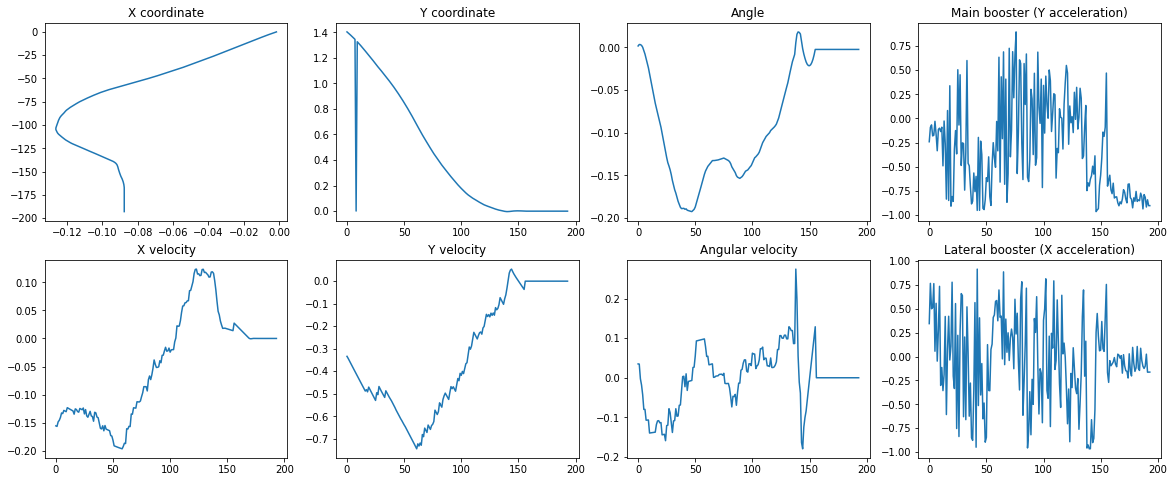

In [86]:
plotExperiment(exp1)

Suponemos que *leg_1* y *leg_2* solo valen 1 si está tocando el suelo

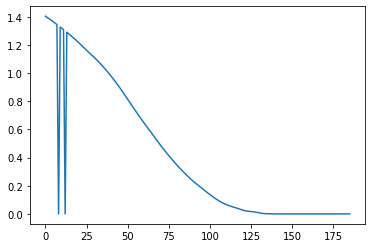

In [56]:
plt.plot(exp1.y_pos)
plt.show()

Aparentemente en el primer experimento la nave cae exageradamente dos veces.

In [39]:
#exp1.loc[exp1.y_pos == 0]
exp1[exp1['y_pos']==0].index.tolist()
#exp1.head(10)

[8, 12]

Nos hemos dado cuenta de que los dos puntos en los que la posición con respecto a __Y__ es igual a 0 se debe a malas lecturas. Si nos fijamos, las velocidades con respecto a ambos ejes y el resto de variables no han cambiado drásticamente como para alcanzar el suelo de golpe.

In [55]:
exp1["y_pos"][1]

1.3953845500946045